In [1]:
from diffusers import StableDiffusionPipeline

pipe = StableDiffusionPipeline.from_ckpt(
    "./meinamix_meinaV10/meinamix_meinaV10.safetensors",
    load_safety_checker=False,
    )
pipe = pipe.to("mps")

# Recommended if your computer has < 64 GB of RAM
pipe.enable_attention_slicing()

global_step key not found in model


Some weights of the model checkpoint at openai/clip-vit-large-patch14 were not used when initializing CLIPTextModel: ['vision_model.encoder.layers.9.layer_norm2.bias', 'vision_model.encoder.layers.12.self_attn.k_proj.bias', 'vision_model.encoder.layers.7.self_attn.q_proj.bias', 'vision_model.encoder.layers.8.mlp.fc1.weight', 'vision_model.encoder.layers.22.self_attn.v_proj.weight', 'vision_model.encoder.layers.21.layer_norm2.weight', 'vision_model.encoder.layers.12.mlp.fc2.weight', 'vision_model.encoder.layers.16.mlp.fc2.weight', 'vision_model.encoder.layers.12.mlp.fc2.bias', 'vision_model.encoder.layers.5.layer_norm2.bias', 'vision_model.encoder.layers.14.layer_norm2.bias', 'vision_model.encoder.layers.18.self_attn.q_proj.weight', 'vision_model.encoder.layers.8.self_attn.out_proj.bias', 'vision_model.encoder.layers.22.mlp.fc1.bias', 'vision_model.encoder.layers.4.self_attn.q_proj.weight', 'vision_model.encoder.layers.19.self_attn.k_proj.bias', 'vision_model.encoder.layers.20.mlp.fc1.b

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

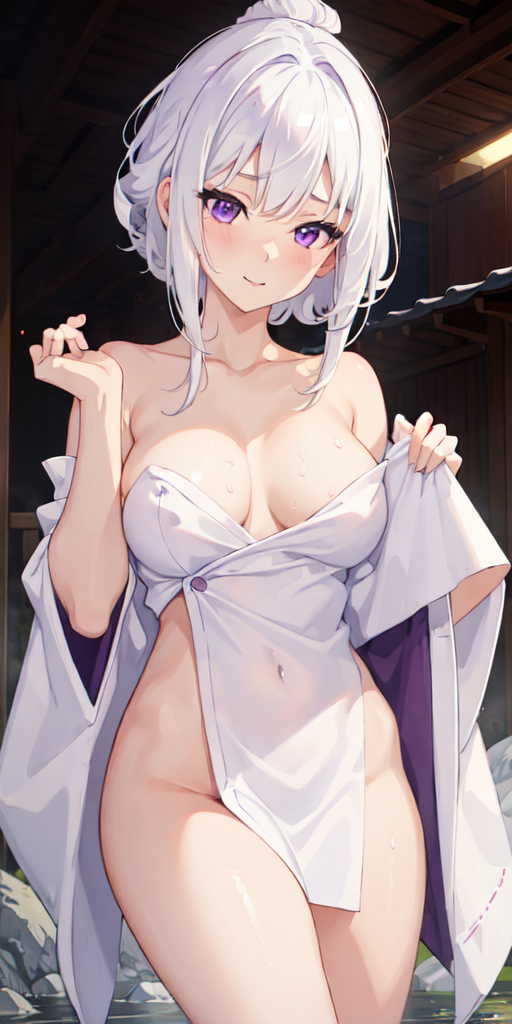

In [4]:
prompt = "1girl, white hair, purple eyes, portrait, realistic, towel, (onsen), sidelighting, wallpaper, nsfw,"
negative_prompt = "(worst quality, low quality:1.4), (zombie, sketch, interlocked fingers, comic),"

# First-time "warmup" pass if PyTorch version is 1.13 (see explanation above)
_ = pipe(prompt, num_inference_steps=1)

# Results match those from the CPU device after the warmup pass.
image = pipe(prompt, num_inference_steps=75, negative_prompt=negative_prompt, width=512, height=1024).images[0]
image